In [4]:
import pandas as pd 

def plate_to_list(plate: pd.DataFrame) -> pd.Series:
    s = plate.stack()
    s.index = [f'{row}{col}' for row, col in s.index]
    return s

def set_plate_axes(df: pd.DataFrame) -> pd.DataFrame:
    """ Given a dataframe representing a multiwell plate, set axes to be proper plate axes. """

    df.columns = range(1, len(df.columns)+1)
    df.index = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P'][:len(df.index)]
    return df

In [2]:
cts = pd.read_csv('20240922_od_cts.csv', index_col=0)
cts

,1,2,3,4,5,6,7,8
A,6.74,NaN,NaN,7.76,9.51,16.26,18.90,18.45
B,7.00,6.83,6.40,NaN,9.84,12.85,19.25,20.69
C,6.96,NaN,NaN,7.02,NaN,11.91,17.83,20.99
D,7.01,NaN,7.00,8.03,9.82,13.22,18.55,20.52
E,8.16,8.20,8.05,8.65,10.07,16.08,18.20,20.57
F,8.23,8.42,7.88,8.28,10.63,13.68,19.12,20.79
G,8.45,7.89,7.72,NaN,11.48,16.90,19.50,20.88
H,8.27,8.19,NaN,NaN,10.25,16.16,18.68,21.08


In [5]:
import pandas as pd 
od = set_plate_axes(pd.read_excel('20240922_od_bact_layout.xlsx', header=None))
phage = set_plate_axes(pd.read_excel('20240922_od_phage_layout.xlsx', header=None))

In [7]:
d = pd.concat([
    plate_to_list(cts), 
    plate_to_list(od),
    plate_to_list(phage)
], axis=1)
d.columns = ['ct', 'od', 'phage']

In [8]:
d[d.od == 1.07]

,ct,od,phage
A8,18.45,1.07,SpCas9
B8,20.69,1.07,SpCas9
C8,20.99,1.07,SpCas9
D8,20.52,1.07,SpCas9
E8,20.57,1.07,SIAH1
F8,20.79,1.07,SIAH1
G8,20.88,1.07,SIAH1
H8,21.08,1.07,SIAH1


In [13]:
ref_ct = 23 # inferred from qpcr on the 2024.09.09 (phage size-dependent propagation)
d['log2(FC)'] = ref_ct - d.ct 

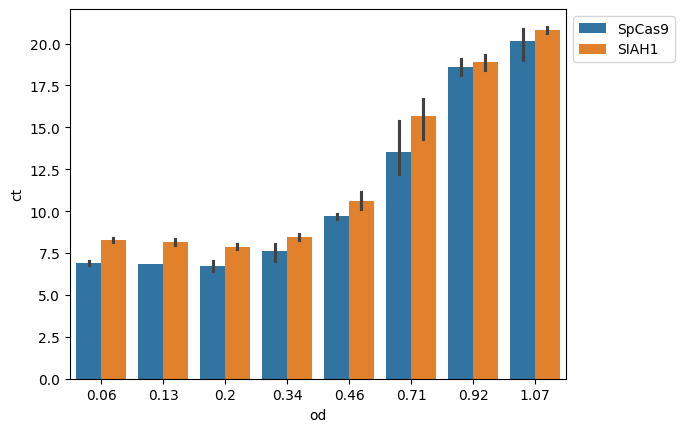

In [14]:
import seaborn as sns 
import matplotlib.pyplot as plt
sns.barplot(data=d, x='od', y='ct', hue='phage')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

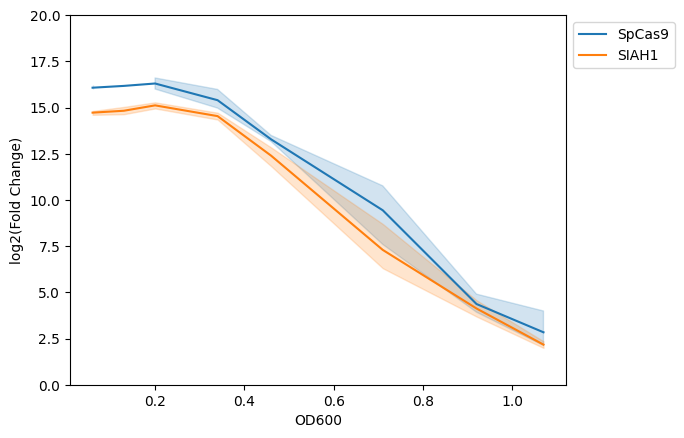

In [15]:
import seaborn as sns 
import matplotlib.pyplot as plt
ax = sns.lineplot(data=d, x='od', y='log2(FC)', hue='phage')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax.set_ylabel('log2(Fold Change)')
ax.set_xlabel('OD600')
ax.set_ylim(0, 20)
plt.savefig('../figs/20240909_supp_fig3.pdf', format='pdf')